# <font color='yellow' style='font-size: 30px;'>Simulação de compensador por atraso</font> <hr style='border: 2px solid yellow;'>

In [16]:
import control
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

Considere o seguinte sistema:

$$ G(s) = \frac{Y(s)}{R(s)} = \frac{20}{6s^2 + 11s + 25} $$

In [19]:
num = [20]
den = [6, 11, 25]

G = control.tf(num, den)
H = control.tf([1], [1])
L = G * H
r = control.pole(L)

print("Raízes: ", r)

Raízes:  [-0.91666667+1.82383905j -0.91666667-1.82383905j]


Considere um sistema de 3º ordem:


- página 197 do Ogata dá o caminho para chegar na fórmula de erro estacionário


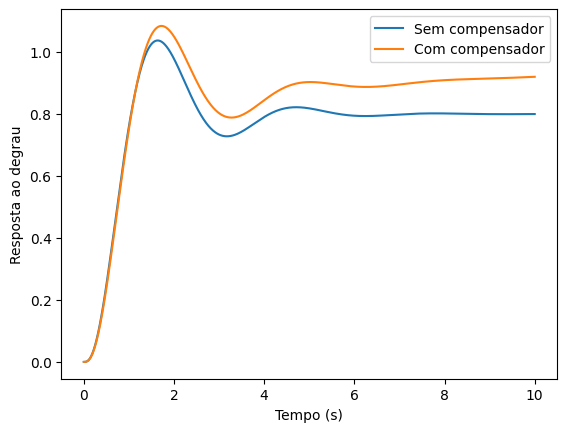

In [3]:
# Sistema 1
num1 = [40]
den1 = [1, 12, 21, 50]
sys1 = control.TransferFunction(num1, den1)

# Sistema 2
num2 = [37.66, 4.61335]
den2 = [1, 12.01, 21.12, 47.87, 4.71]
sys2 = control.TransferFunction(num2, den2)

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Resposta ao degrau
t1, y1 = control.step_response(sys1, t)
t2, y2 = control.step_response(sys2, t)

# Plot das respostas
plt.plot(t1, y1, label='Sem compensador')
plt.plot(t2, y2, label='Com compensador')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao degrau')
plt.legend()
plt.show()


                          0
RiseTime           0.761185
SettlingTime       4.110400
SettlingMin        0.766017
SettlingMax        0.964681
Overshoot         20.585075
Undershoot         0.000000
Peak               0.964681
PeakTime           1.750726
SteadyStateValue   0.800000
Error :[1.         0.99983402 0.99934019 0.99852466 0.99739363 0.99595331
 0.9942099  0.99216965 0.9898388  0.98722359 0.98433028 0.98116512
 0.97773437 0.97404427 0.97010106 0.96591099 0.96148026 0.9568151
 0.95192169 0.94680621 0.94147482 0.93593363 0.93018878 0.92424632
 0.91811232 0.91179279 0.90529372 0.89862107 0.89178075 0.88477865
 0.87762059 0.87031238 0.86285977 0.85526847 0.84754414 0.8396924
 0.83171881 0.82362888 0.81542809 0.80712182 0.79871545 0.79021427
 0.78162351 0.77294837 0.76419396 0.75536535 0.74646753 0.73750546
 0.728484   0.71940796 0.7102821  0.7011111  0.69189956 0.68265204
 0.67337302 0.6640669  0.65473804 0.6453907  0.63602908 0.62665733
 0.61727949 0.60789956 0.59852146 0.58914904 

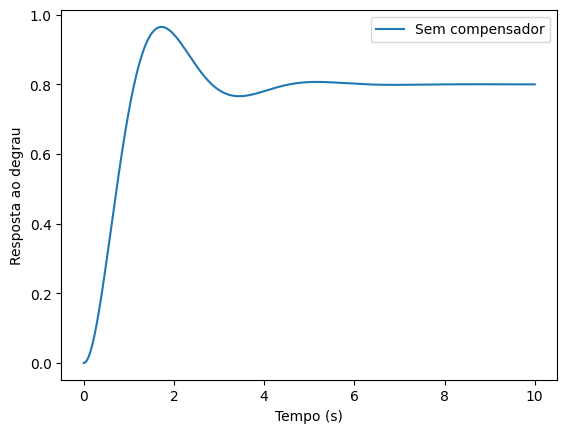

In [14]:
# Sistema 1
num1 = [20]
den1 = [6, 11, 25]
sys1 = control.TransferFunction(num1, den1)

# Sistema 2
# num2 = [37.66, 4.61335]
# den2 = [1, 12.01, 21.12, 47.87, 4.71]
# sys2 = control.TransferFunction(num2, den2)

# Tempo de simulação
t = np.linspace(0, 10, 1000)
ref = np.ones_like(t)


# Resposta ao degrau
t1, y1 = control.step_response(sys1, t)

# Calcular informações da resposta ao degrau
info = control.step_info(sys1)

# Converter dicionário em dataframe
df = pd.DataFrame.from_dict(info, orient='index')
print(df)
print(f"Error :{ref - y1}")

# Plot das respostas
plt.plot(t1, y1, label='Sem compensador')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao degrau')
plt.legend()
plt.show()
